# Notebook Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [5]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [6]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculating the Joint Probability

### The Dot Product

In [7]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a =', a)
print('b =', b)

a = [1 2 3]
b = [0 5 4]


In [8]:
print(a.dot(b))  # 1*0 + 2*5 + 3*4 = 22

22


In [9]:
c = np.array([[0,6], [3,0], [5,1]])
c.shape

(3, 2)

In [10]:
print(a.dot(c))
print('Shape of dot product is:', a.dot(c).shape)

[21  9]
Shape of dot product is: (2,)


<p>
   a.c = [1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1] = [21, 9]
</p>

**Challenge:** Can you figure out the dimensions of the dot product between X_test and prob_token_spam?

In [11]:
X_test.shape

(1723, 2500)

In [12]:
prob_token_spam.shape

(2500,)

In [13]:
print('Shape of dot product is:', X_test.dot(prob_token_spam).shape)

Shape of dot product is: (1723,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [14]:
PROB_SPAM = 0.3116

**Challenge:** Do you recall how to take the log of a numpy array? Calculate the log probabilities of the token given that the email was spam. This was stored in prob_token_spam.

In [15]:
np.log(prob_token_spam)

array([ -4.70347216,  -5.31317036,  -4.97906219, ...,  -8.72266654,
       -10.57896453, -10.1089609 ])

In [16]:
prob_token_spam[:5]

array([0.00906375, 0.00492628, 0.00688051, 0.01066174, 0.00691614])

## Joint probability in log format

In [17]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [18]:
joint_log_spam[:5]

array([  3.27891895,  15.72485328,  19.56116014, -16.3956091 ,
        28.65015803])

**Challenge:** Calculate the log probability that the emails are non-spam given their tokens.
Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(Spam))} {P(X)} $$

In [19]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [20]:
joint_log_ham[:5]

array([-11.08326867, -40.13128805, -38.48842418,  -2.88460015,
       -60.64442101])

In [21]:
# To check total values
joint_log_ham.size

1723

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X) $$
<br>
<center><b>OR</b></center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X) $$

**Challenge:** Can you create the vector of predictions, our $\hat y$? Remember that spam emails should have the value 1(true) and non-spam emails should have the value 0(false). Store your results in a variable called `prediction`.

In [22]:
prediction = joint_log_spam > joint_log_ham

In [23]:
prediction[-5:]

array([False, False, False, False, False])

In [24]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X\, | \, Spam) \, P(Spam) ≠ \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [25]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation 

## Accuracy

In [27]:
correct_doc = (y_test == prediction).sum()
print('Docs classified correctly', correct_doc)

Docs classified correctly 1673


In [28]:
numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs classified incorrectly', numdocs_wrong)

Docs classified incorrectly 50


In [29]:
# Accuracy = (Nr of correct predictions) / (Total nr of predictions)
correct_doc/len(X_test)

0.9709808473592572

In [38]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1 - fraction_wrong))

Fraction classified incorrectly is 2.90%
Accuracy of the model is 97.10%


## Visualizing the Results

In [49]:
# Chart styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

# To plt line
linedata = np.linspace(start=-14000, stop=1, num=1000)

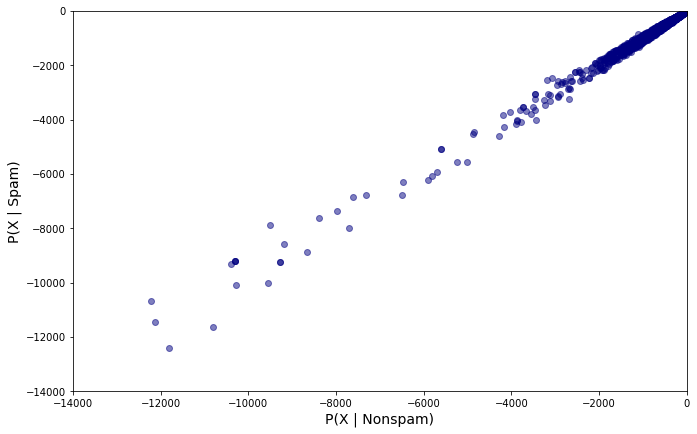

In [48]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale (zooming)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5)
plt.show()

## The Decision Boundary

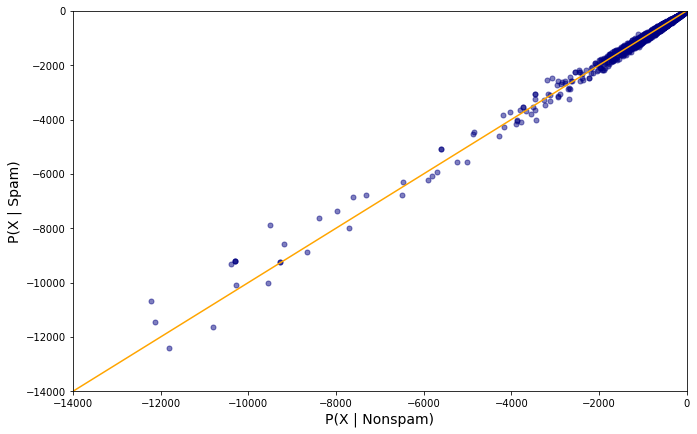

In [52]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale (zooming)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
# Plotting the line
plt.plot(linedata, linedata, color='orange')

plt.show()

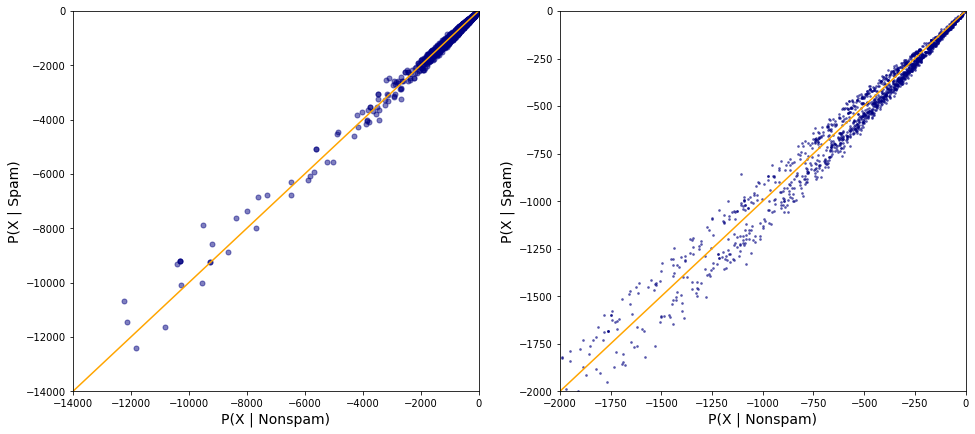

In [54]:
plt.figure(figsize=(16,7))

# CHART: 01
plt.subplot(1,2, 1)  #1row, 2col, 1 index
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
# Plotting the line
plt.plot(linedata, linedata, color='orange')

# CHART: 02
plt.subplot(1,2, 2)  #1row, 2col, 2 index

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
# Plotting the line
plt.plot(linedata, linedata, color='orange')

plt.show()

In [55]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

# Creating a dictionary
summary_df = pd.DataFrame({yaxis_label: joint_log_spam, 
                           xaxis_label: joint_log_ham,
                           labels: y_test})

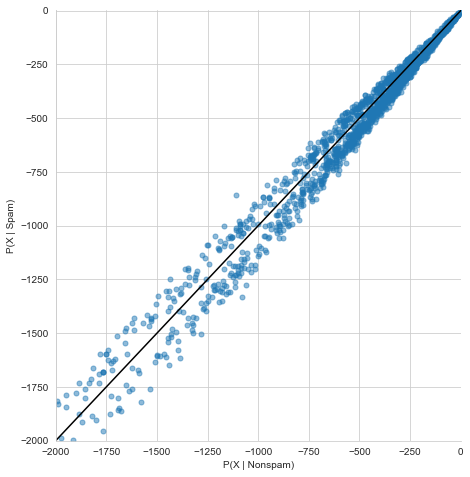

In [66]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5,
           fit_reg=False, #To hide regression line
           scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata, linedata, color='black')

plt.show()

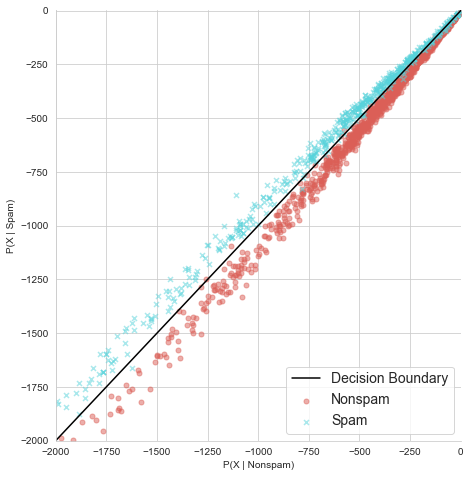

In [75]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5,
           fit_reg=False,   #To hide regression line
           scatter_kws={'alpha': 0.5, 's': 25},
           hue=labels,      #Specify true values
           markers=['o','x'],
           palette='hls',   #color combination
           legend=False     #Hide default legend
          )

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata, linedata, color='black')

# Legend -Chart Key
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()